In [99]:
import numpy as np
import pandas as pd
import skimage.io as io
from PIL import Image
import matplotlib.pyplot as plt

In [100]:
# img = Image.open('The-Cameraman-Image-transmitted-from-Alice-to-Bob-This-image-is-extensively-used-as-a.png').convert('L')
# img.save('greyscale3.png')
# img = Image.open('Plain-Baboon-Image-Figure-7-Ciphered-Baboon-Image.ppm').convert('L')
# img.save('greyscale.png')

# img = Image.open('images.jpeg').convert('L')
# img.save('greyscale2.png')
   

In [ ]:
vecImg=io.imread('greyscale.png')
vecImg.shape

(512, 512)

In [102]:
vecImg = vecImg.astype(np.float64)

In [103]:
# We are Given 512*512 Image For First 
#We Need To Apply SVD here ,to compress the image and Find Compression Ratio For all Images 
# the equation is A=U*SIGMA*VT

In [104]:
#Firstly Calculate U
AAT=np.dot(vecImg,vecImg.T)
print(AAT.shape)
eigenval,eigenvec=np.linalg.eig(AAT)
ATA=np.dot(vecImg.T,vecImg)
print(ATA.shape)
eigenvalT,eigenvecT=np.linalg.eig(ATA)



(512, 512)
(512, 512)


In [105]:
print(eigenval.shape)
print(eigenvec.shape)
print(eigenvalT.shape)
print(eigenvecT.shape)

(512,)
(512, 512)
(512,)
(512, 512)


In [106]:
eigenval[0:10]

array([4.50725564e+09, 9.10068769e+07, 3.86992113e+07, 1.91016123e+07,
       1.29619867e+07, 8.55294710e+06, 7.11336849e+06, 5.83070711e+06,
       5.41739515e+06, 4.69457637e+06])

In [107]:
print(eigenvalT[0:10])

[4.50725564e+09 9.10068769e+07 3.86992113e+07 1.91016123e+07
 1.29619867e+07 8.55294710e+06 7.11336849e+06 5.83070711e+06
 5.41739515e+06 4.69457637e+06]


In [108]:
idx = np.argsort(eigenval)[::-1]   
eigenval = eigenval[idx]
eigenvec = eigenvec[:, idx]

idx = np.argsort(eigenvalT)[::-1]
eigenvalT = eigenvalT[idx]
eigenvecT = eigenvecT[:, idx]

In [109]:
print(eigenval[0:10])
print(eigenvalT[0:10])

[4.50725564e+09 9.10068769e+07 3.86992113e+07 1.91016123e+07
 1.29619867e+07 8.55294710e+06 7.11336849e+06 5.83070711e+06
 5.41739515e+06 4.69457637e+06]
[4.50725564e+09 9.10068769e+07 3.86992113e+07 1.91016123e+07
 1.29619867e+07 8.55294710e+06 7.11336849e+06 5.83070711e+06
 5.41739515e+06 4.69457637e+06]


In [110]:
U=eigenvec
V=eigenvecT

In [111]:
singular_vals = np.sqrt(np.maximum(eigenval, 0)) 
Sigma = np.zeros((U.shape[0], V.shape[0]))
np.fill_diagonal(Sigma, singular_vals)

In [112]:

Sigma

array([[6.71360979e+04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.53975245e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 6.22086901e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.23143399e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.33348551e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.52454070e-01]])

In [113]:
U.shape,Sigma.shape,V.shape


((512, 512), (512, 512), (512, 512))

In [122]:
print(U.shape,Sigma.shape,V.shape)

(512, 512) (512, 512) (512, 512)


In [114]:
def reconstruct_image(U, s, Vt, k):
    U_k = U[:, :k]
    S_k = np.diag(s[:k])
    Vt_k = Vt[:k, :]
    return U_k @ S_k @ Vt_k

In [115]:
def reconstruction_error(A, A_k):
    return np.linalg.norm(A - A_k, 'fro')**2 / np.linalg.norm(A, 'fro')**2

In [116]:
def compression_ratio(m, n, k):
    return (m*n) /(m*k + n*k + k)

In [ ]:
k_list = [5, 20, 50, 100, 200,225]

In [ ]:
errors = []
ratios = []

In [119]:
plt.figure(figsize=(15, 8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

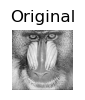

In [120]:
plt.subplot(2, len(k_list)+1, 1)
plt.imshow(vecImg, cmap="gray")
plt.title("Original")
plt.axis("off")

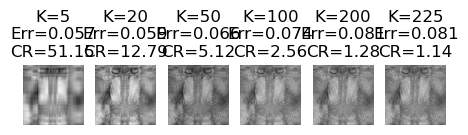

In [121]:
for i, k in enumerate(k_list, start=2):
    A_k = reconstruct_image(U, singular_vals, V.T, k)
    err = reconstruction_error(vecImg, A_k)
    cr = compression_ratio(vecImg.shape[0], vecImg.shape[1], k)

    errors.append(err)
    ratios.append(cr)

    plt.subplot(2, len(k_list)+1, i)
    plt.imshow(A_k, cmap="gray")
    plt.title(f"K={k}\nErr={err:.3f}\nCR={cr:.2f}")
    plt.axis("off")